# Usage of Dynamo API

Transform celldancer dataframe to anndata, then plot the velocity vector of each cell.

## Import packages

In [1]:
%%capture

# import packages
import dynamo as dyn
import numpy as np
import pandas as pd
import anndata as ann
import matplotlib.pyplot as plt
import celldancer as cd
import celldancer.utilities as cdutil

## Load the velocity estimation result of all 1,054 genes

To project the prediction of RNA velocity to vector fields in embedding space and to estimate pseudotime by using all genes, all the 1,054 genes have already been predicted and could be downloaded and unzipped from [HgForebrainGlut_cellDancer_estimation_unspliced_spliced.csv.zip](https://drive.google.com/file/d/TBD). The csv file could be loaded by ```pd.read_csv()```.

In [2]:
# load the prediction result of all genes
cellDancer_df_u_s_file = 'data/HgForebrainGlut_cellDancer_estimation_unspliced_spliced.csv'
cellDancer_df_u_s=pd.read_csv(cellDancer_df_u_s_file)

In [3]:
cellDancer_df_u_s

,Unnamed: 0,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2,index,velocity1,velocity2
0,0,0,SCAPER,0.377907,0.300250,0.405763,0.312984,0.272667,0.574098,0.637763,0.067002,10X_17_028:AACCATGGTAATCACCx,Neuroblast,-0.089552,1.610141,0,-0.238766,-0.097604
1,1,1,SCAPER,0.346111,0.307946,0.376842,0.309154,0.260747,0.575780,0.639291,0.067002,10X_17_028:AACCATGCATACTACGx,Neuroblast,0.177206,1.852133,1,-0.223590,-0.037993
2,2,2,SCAPER,0.377427,0.157733,0.425090,0.214923,0.307992,0.563463,0.623120,0.067002,10X_17_028:AAACCTGGTAAAGGAGx,Radial Glia,7.815600,5.937497,2,-0.070768,-0.119006
3,3,3,SCAPER,0.450290,0.237188,0.478714,0.290154,0.312150,0.566972,0.629754,0.067002,10X_17_028:AAAGTAGCAAAGTCAAx,Radial Glia,6.701630,8.941791,3,0.128211,-0.279892
4,4,4,SCAPER,0.405460,0.349812,0.423425,0.354449,0.269818,0.576849,0.642101,0.067002,10X_17_028:AAAGCAACAAACGCGAx,Neuroblast,-1.126250,1.166313,4,-0.442851,0.011849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812875,1812875,1715,PCP4,0.000000,0.017668,0.000006,0.017446,0.000013,0.214343,0.025120,0.055841,10X_17_029:TTTATGCGTTGCGCACx,Radial Glia,5.943436,7.754985,1715,0.111940,-0.211817
1812876,1812876,1716,PCP4,0.000000,0.012055,0.000007,0.011903,0.000013,0.214868,0.025108,0.055841,10X_17_029:TTTGCGCGTTCCGTCTx,Neuroblast,-2.248025,0.979071,1716,-0.420666,-0.064146
1812877,1812877,1717,PCP4,0.004955,0.156260,0.004458,0.154778,0.000007,0.202196,0.025381,0.055841,10X_17_029:TTTGGTTGTACCCAATx,Neuron,-8.651434,4.843134,1717,-0.162622,0.434658
1812878,1812878,1718,PCP4,0.000000,0.014440,0.000006,0.014259,0.000013,0.214645,0.025113,0.055841,10X_17_029:TTTCCTCCAGTCCTTCx,Radial Glia,7.854761,8.556604,1718,0.107540,-0.174899


## Example Usage

In [4]:
#transform celldancer dataframe to anndata
adata_from_dancer_u_s = cdutil.to_dynamo(cellDancer_df_u_s)

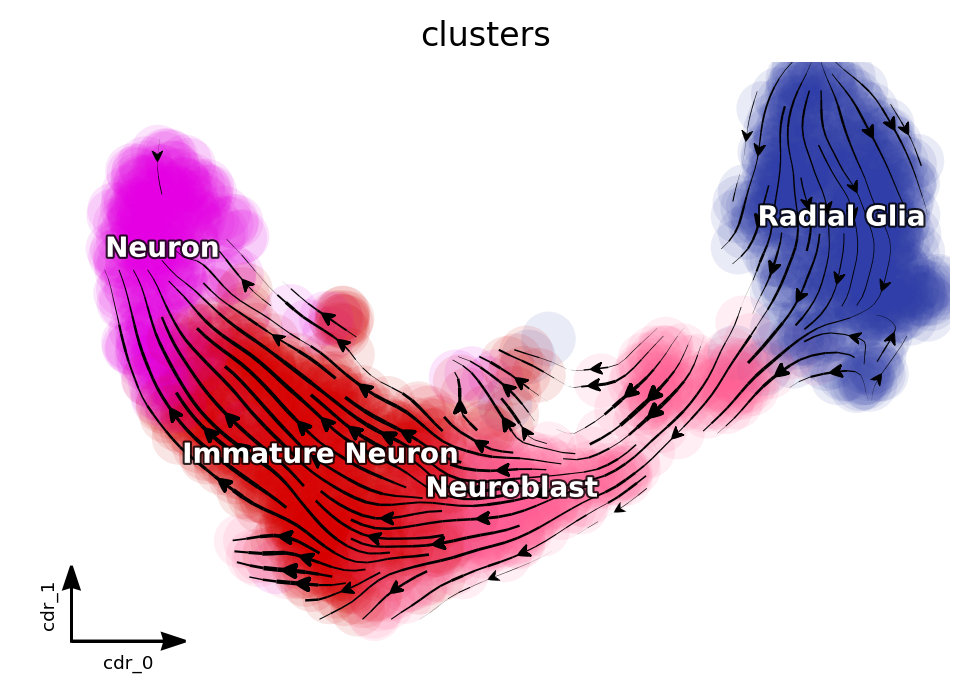

<Figure size 640x480 with 0 Axes>

In [7]:
#plot the velocity vector of each cell
#fig, ax = plt.subplots(figsize=(6,6))

dyn.pl.streamline_plot(adata_from_dancer_u_s, 
                       color=["clusters"], 
                       basis = "cdr", 
                       show_legend="on data", 
                       show_arrowed_spines=True)
plt.savefig('figure/dynamo_u_s.pdf')